# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


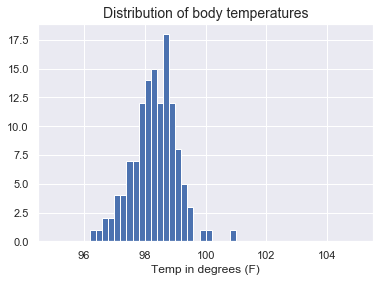

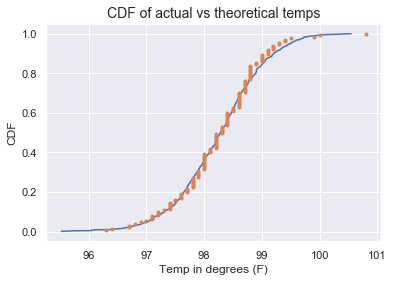

In [6]:
# 1.) Is the distribution of body temperatures normal?
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

# Test for normality with plotting
plt.hist(x=df['temperature'],bins=50,range=(95,105))
plt.xlabel('Temp in degrees (F)')
plt.title('Distribution of body temperatures', fontsize=14)
plt.show()

# Test for normality with ECDF
def ecdf(data):
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y
samples = np.random.normal(98.249231,0.733183,1000)
x, y = ecdf(df['temperature'])
x_theor, y_theor = ecdf(samples)
plt.plot(x_theor,y_theor)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('Temp in degrees (F)')
plt.ylabel('CDF')
plt.title('CDF of actual vs theoretical temps', fontsize=14)
plt.show()

### 1.) Is the distribution of body temperatures normal?

From the above plots, we can see that the distribution of body temperatures is approximately normal.  First, a histogram of our temperature data has the shape of a normal distribution and is centered around the mean of 98.24.  Second, if we plot the cumulative distribution function of our temperature data against a normally distributed random sampling of 1,000 samples, we can see that both the actual and theoretical distributions are normally distributed as well.

### 2. Is the sample size large? Are the observations independent?

Typically, if one's sample size is <= 10% of the total population, one can assume independence.  However, since we know that 130 is much, much less than 10% of the total population, we need to take another approach.

In [7]:
# Bootstrap hypothesis testing
def bootstrap_replicate_func(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_func(data,func)
    return bs_replicates
df['trans_temp'] = df['temperature']-np.mean(df['temperature'])+98.6
bs_replicates = draw_bs_reps(data=df['trans_temp'], func=np.mean, size=10000)
p = np.sum(bs_replicates <= np.mean(df['trans_temp'])) / 10000
print('p = ', p)

p =  0.5068


### 3. Is the true population mean really 98.6 degrees F?

Given a bootstrap hypothesis test, a moderate p-value of .5028 suggests that the null hypothesis that 98.6 is the true population mean is true.

p =  0.5055
